<a href="https://colab.research.google.com/github/hsantos1985/Linear_regression_models/blob/main/Dados_gripe_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados do Google Flu

A epidemia de gripe é um grande problema de saúde pública que causa um grande número de hospitalizações e mortes. De acordo com o National Vital Statistics Reports, publicado em outubro de 2012, influenza é a oitava causa de mortes em 2011 nos Estados Unidos. Para o mundo todo, a cada ano, morrem de 250000 à 500000 pessoas por ano de influenza.

O Centro de Controle de Doenças (CDC) e o 
European Influenza Surveillance Scheme (EISS) detectam influenza através de dados clínicos, entretanto essas informações são publicadas com atraso de 1-2 semanas.

O Google Flu Trends é um projeto que foi criado para testar se é possível identificar a quantidade de casos de gripe baseado na quantidade de buscas sobre o assunto, já que esse dado pode ser recuperado imediatamente.

Nosso objetivo é estimar o número de doenças similares a influenza (influenza-like illness ILI) usando a informação das buscas do Google. 

Uma das fontes de dados, o Google Search Queries - Google Trends fornece a contagem semanal de buscas dos usuários do google ao redor do mundo. Para cada local, a contagem é normalizada dividindo a contadem de cada busca na semana pelo número total de buscas. Dessa forma os valores estão entre 0 e 1.
 
 O arquivo csv [FluTrain](https://raw.githubusercontent.com/abnr/ml-data/main/FluTrain.csv) agrega os dois dados de Janeiro de 2004 até Dezembro de 2011, com as colunas:

"Week" - A faixa de datas a qual a observação foi feita, no formato ano/mes/dia.

"ILI" - A porcentagem de casos de ILI reportados na semana.

"Queries" - A fração das buscas de ILI naquela semana.

O arquivo [FluTest](https://raw.githubusercontent.com/abnr/ml-data/main/FluTest.csv) contem os dados de 2012, utilize esses dados para teste.



In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from scipy import stats
from scipy.stats.stats import pearsonr
import scipy
from sklearn.metrics import r2_score, mean_squared_error
from IPython.core.pylabtools import figsize



import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df_treino=pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/FluTrain.csv')

In [ ]:
df_teste=pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/FluTest.csv')

# Inspeção de dados

In [ ]:
df_treino.head()

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436


In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Week     417 non-null    object 
 1   ILI      417 non-null    float64
 2   Queries  417 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.9+ KB


In [ ]:
#análise descritiva do dataset
df_treino.describe().T

,count,mean,std,min,25%,50%,75%,max
ILI,417.0,1.676861,1.126163,0.534093,0.902459,1.252563,2.058690,7.618892
Queries,417.0,0.286028,0.157697,0.041169,0.156707,0.281541,0.378486,1.000000


In [ ]:
#checando duplicidades das linhas
df_treino.duplicated().sum()

0

In [ ]:
#verificando a existência de valores nulos
df_treino.isnull().sum().sort_values(ascending=True)

Week       0
ILI        0
Queries    0
dtype: int64

# EDA (Análise Exploratória de Dados)

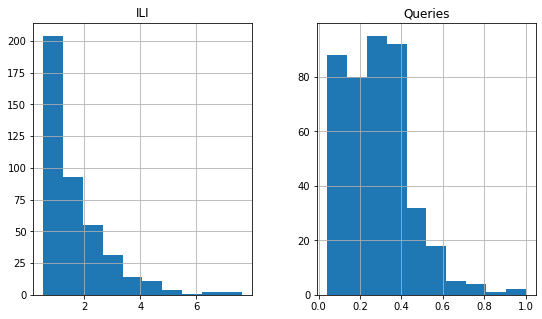

In [ ]:
#analisando graficamente as variáveis
df_treino.hist(figsize=(9,5))
plt.show();

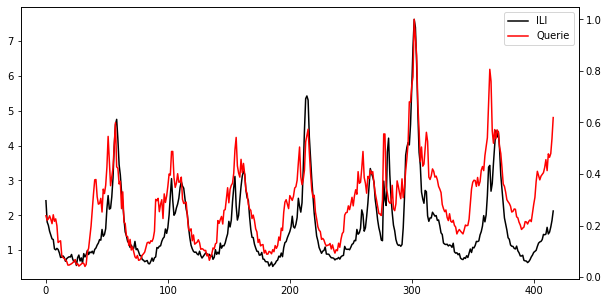

In [ ]:
#fazendo o comparativo entre as variáveis ILI e Queries
fig, ax1 =plt.subplots(figsize=(10,5))

ax2=ax1.twinx()

ILI,=ax1.plot(df_treino['ILI'],color='black', label='ILI')
Querie,=ax2.plot(df_treino['Queries'], color='red',label='Querie' )
ax1.legend(handles=[ILI, Querie]);


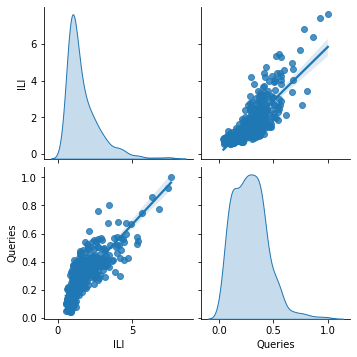

In [ ]:
#Verificando a relação entre todas as variáveis usando o pairplot

colunas=df_treino.columns
sns.pairplot(df_treino.loc[:,colunas], diag_kind='kde', kind='reg')

# Criação do modelo

In [ ]:
#sepearando as variáveis de treino e teste
x_treino=df_treino['ILI']
y_treino=df_treino['Queries']

x_teste=df_teste['ILI']
y_teste=df_teste['Queries']

In [ ]:
#criação do modelo

x_treinoc = sm.add_constant(x_treino)
model = sm.OLS(y_treino, x_treinoc)
results = model.fit();

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Queries   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     816.2
Date:                Tue, 01 Mar 2022   Prob (F-statistic):          4.79e-100
Time:                        00:08:46   Log-Likelihood:                 405.78
No. Observations:                 417   AIC:                            -807.6
Df Residuals:                     415   BIC:                            -799.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0948      0.008     11.770      0.0

In [ ]:
x_treinoc = sm.add_constant(x_treino)
y_treino_p=results.predict(x_treinoc)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#MSE para as variáveis treino
mse_treino = mean_squared_error(y_treino, y_treino_p)
mse_treino

0.008362008951527312

In [ ]:
#MAPE para as variáveis treino
np.sqrt(mse_treino)

0.09144402086264204

In [ ]:
#verificando o modelo nas variáveis de teste

x_testec = sm.add_constant(x_teste)
y_teste_p=results.predict(x_testec)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#MSE para as variáveis teste

mse_teste = mean_squared_error(y_teste, y_teste_p)
mse_teste

0.02157189743338592

In [ ]:
#MAPE para as variáveis teste
np.sqrt(mse_teste)

0.146873746576391

In [ ]:
#Analisando o MSE e MAPE entre as variéveis de treino e teste verifica-se que exitse diferença significativa nestes indicadores.
#Evidenciando a necessidade de mais testes no modelo em outros datasets

# Avaliando as premissas do modelo


# 1 Linearidade
Variável target pode ser estimada através da combinação linear entre as variáveis de entrada.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


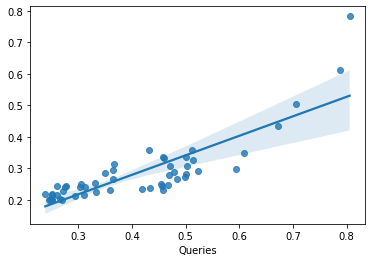

In [ ]:
sns.regplot(y_teste, y_teste_p);

In [ ]:
# pelo gráfico anterior é possível verificar uma pequena tendência de a variáve de saída ser estimada através das variáveis de entrada

# 2 - Resíduos( diferença entre a resutado real e o previsto) tem médias iguais a 0
A regressão linear assume que o que não é capturado pelo modelo, os resíduos, tem média 0.

In [ ]:
results.resid.mean()

6.762509550474574e-17

In [ ]:
#Percebe-se que a média de resíduos é aproximadamente igual a 0

# 3 - Sem multicolinariedade (forte)

As variáveis não podem ser fortemente correlacionadas entre si. Em outras palavras, não deve ser possível prever uma variável de entrada a partir de outra.

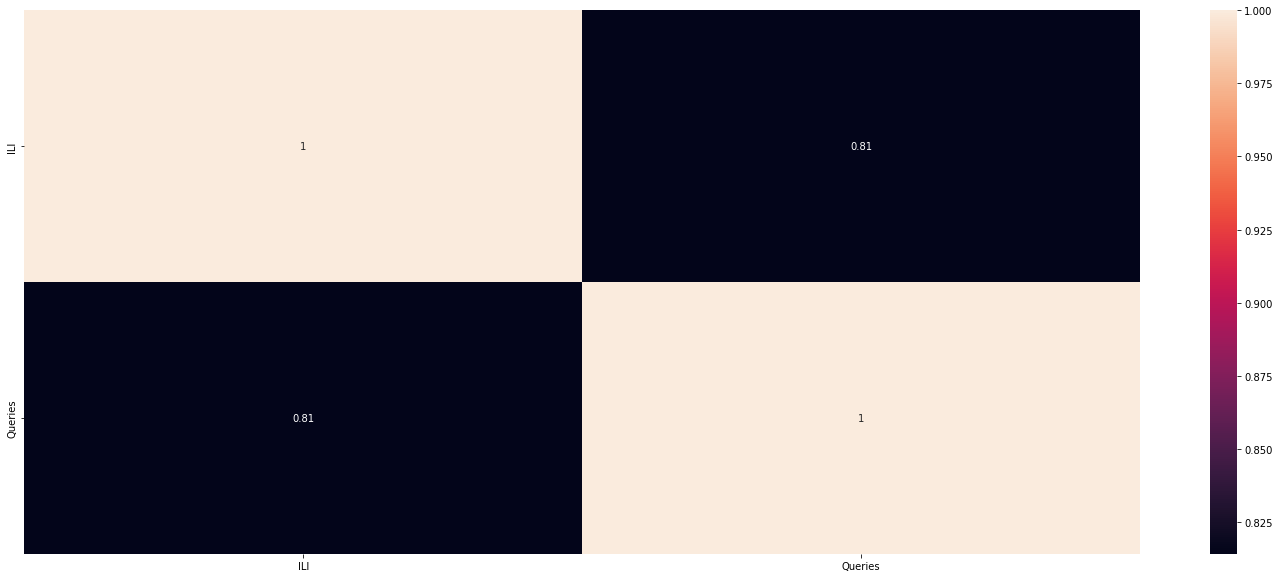

In [ ]:
# matriz de correlação
plt.figure(figsize=(25,10))
sns.heatmap(df_treino.corr(), annot=True)
plt.show()

#verifica-se que as variáveis possuem correlação forte

# 4 - Homecedasticidade dos resíduos
A regressão assume que os resíduos possuem variância igual. Quando a variância dos resíduos não é constante dizemos que possui heteroscedasticidade.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


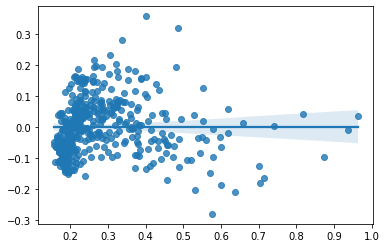

In [ ]:
y_pred=results.predict(x_treinoc)
sns.regplot(y_pred, results.resid);

H0  do teste Goldfeld-Quandt assume que os resíduos são homoscedasticos. 


In [ ]:
t, p, _ = sms.het_goldfeldquandt(results.resid, x_treinoc)
print(p)

#como os valores do p-value são menores que 5%, rejeita-se H0, assim os resíduos não são homocedásticos, 
#isto é, a variância dos resíduos não é constante
#Este fato é confirmado pelo gráfico

0.0010514716862892435


# 5 - Resíduos não podem ser autocorrelacionados
Autocorrelação nos resíduos significa que o resíduo depende de valores anteriores dos resíduos.
Durbin Watson Test
A saída do teste é sempre entre 0 e 4, onde:

Valor igual a 2 significa que não tem autocorrelação nos resíduos.
Valor < 2 indica correlação positiva nos resíduos.
Valor > 2 indica correlação negativa nos resíduos.

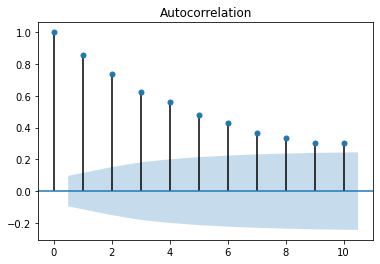

In [ ]:
acf = smt.graphics.plot_acf( results.resid, lags=10, alpha=0.05 )
acf.show()

#pelo gráfico anterior verifica-se que os resíduos são autocorrelacionados

#6 - Resíduos e variáveis não correlacionados
Resíduos correlacionados significa que os resíduos não são componentes totalmente aleatórios.

In [ ]:
corr_test1 = pearsonr( df_treino['ILI'], results.resid )
corr_test2 = pearsonr( df_treino['Queries'], results.resid )
print(corr_test1)
print(corr_test2)
#pelos resultados, verifica-se que as a variável Querie e seus residuos são correlacionados

(5.052382123782451e-16, 0.9999999999997654)
(0.5805683550292013, 6.063591412835878e-39)


#7 - Normalidade dos resíduos
Se os resíduos nao fore norais haverá problemas na determinação dos intervalos de confiança e o nível de significância dos coeficientes

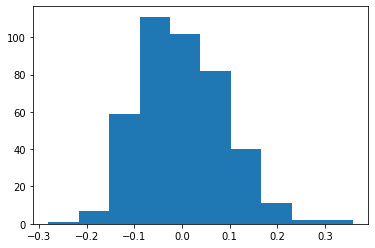

In [ ]:
plt.hist(results.resid);

In [ ]:
from scipy.stats.morestats import shapiro
shapiro(results.resid)
#pelo resultado do teste de Shapiro, observa-se que os resíduos não são normais

(0.9858033657073975, 0.0004210332699585706)

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Queries   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     816.2
Date:                Tue, 01 Mar 2022   Prob (F-statistic):          4.79e-100
Time:                        01:16:45   Log-Likelihood:                 405.78
No. Observations:                 417   AIC:                            -807.6
Df Residuals:                     415   BIC:                            -799.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0948      0.008     11.770      0.0

In [ ]:
#pelo histograma anterior, resultado do teste de normalidade de Shapiro, e p-value no Omnibus. verifica-se que os resíduos não são normais

# Conclusão

Pode ser concluído que o modelo não é adequado para estimar a relação entre o número de doenças e pesquisas no Google.
Apesar de o coefciente de determinação ser de 63,2%.
Verifica-se qeu os resultado sde MSE e MAPE para as variáveis de treino e teste estão bastante discrepantes e as premissas anteriores de validação não forma atendidas.
Com destaque para:
- A falta de normalidade entre os residuos:
- Resíduos não são homocedásticos
- Correlação entre os resíduos